# Diabetes Readmission Prediction

In [154]:
%pip install --upgrade pip
%pip install pandas 
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn 
%pip install catboost
%pip install xgboost 


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [155]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer

In [156]:
data = pd.read_csv("https://raw.githubusercontent.com/Rubina15Parveen/Diabetes_Readmission_Prediction/refs/heads/main/notebook/data/diabetic_data.csv")

In [157]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [158]:
data.tail(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Exploratory Data Analysis 

### 1. Exploring Race Feature

In [160]:
data['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

We can see that in Race we have 6 unique values and the count is biased towards Caucasians and African Americans. 

In [161]:
data['race'] = data['race'].replace('?', 'Unknown')

In [162]:
race_param = data['race'].value_counts().reset_index()

In [163]:
race_param

,race,count
0,Caucasian,76099
1,AfricanAmerican,19210
2,Unknown,2273
3,Hispanic,2037
4,Other,1506
5,Asian,641


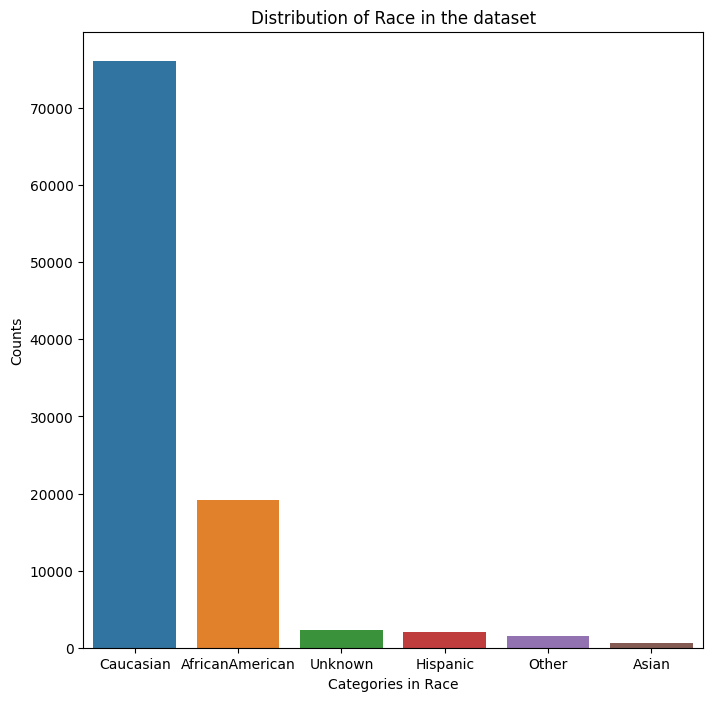

In [164]:
plt.figure(figsize=(8, 8))
sns.barplot(x='race', y='count', data = race_param, hue='race')
plt.title("Distribution of Race in the dataset")
plt.xlabel("Categories in Race")
plt.ylabel("Counts")
plt.show()

### 2. Exploring Gender Feature  

In [165]:
data['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [166]:
data['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [167]:
data['gender']  = data['gender'].replace('Unknown/Invalid', 'Unknown')

In [168]:
gender_param = data['gender'].value_counts().reset_index()

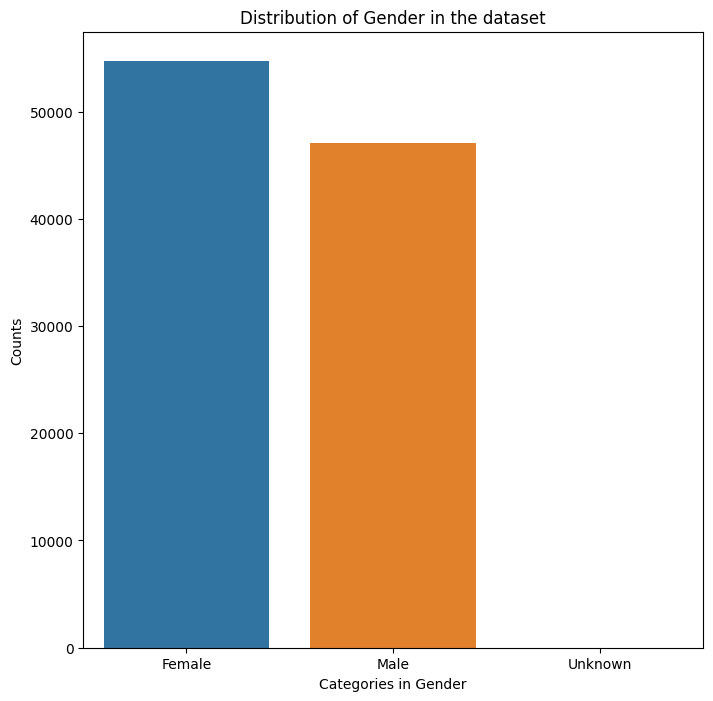

In [169]:
plt.figure(figsize=(8, 8))
sns.barplot(x='gender', y='count', data= gender_param, hue='gender')
plt.title("Distribution of Gender in the dataset")
plt.xlabel("Categories in Gender")
plt.ylabel("Counts")
plt.show()

### 3. Exploring Age feature 

In [170]:
data['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [171]:
age_param = data['age'].value_counts().reset_index()

In [172]:
age_param

,age,count
0,[70-80),26068
1,[60-70),22483
2,[50-60),17256
3,[80-90),17197
4,[40-50),9685
5,[30-40),3775
6,[90-100),2793
7,[20-30),1657
8,[10-20),691
9,[0-10),161


We can see that people who are >=50 are dominating this dataset. It makes sense here because usually we find that aged people have more chances of having a disease and getting admitted. 

<Axes: xlabel='age', ylabel='count'>

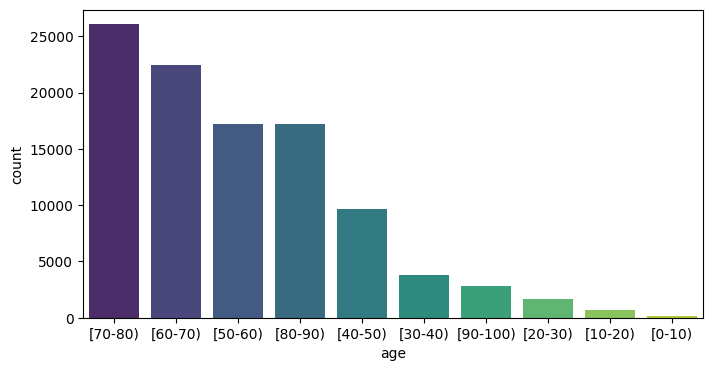

In [173]:
plt.figure(figsize=(8, 4))
sns.barplot(data=age_param, x='age', y='count', hue='age', palette="viridis")

### 4. Exploring Weight feature

In [174]:
data['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [175]:
data['weight'].value_counts().reset_index()


,weight,count
0,?,98569
1,[75-100),1336
2,[50-75),897
3,[100-125),625
4,[125-150),145
5,[25-50),97
6,[0-25),48
7,[150-175),35
8,[175-200),11
9,>200,3


In [176]:
data['weight']= data['weight'].replace('?', 'Unknown')

In [177]:
weight_param = data['weight'].value_counts().reset_index()
weight_param

,weight,count
0,Unknown,98569
1,[75-100),1336
2,[50-75),897
3,[100-125),625
4,[125-150),145
5,[25-50),97
6,[0-25),48
7,[150-175),35
8,[175-200),11
9,>200,3


<Axes: xlabel='weight', ylabel='count'>

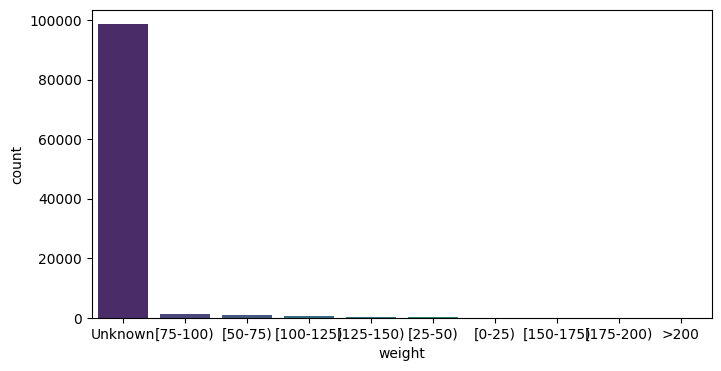

In [178]:
plt.figure(figsize=(8, 4))
sns.barplot(x='weight', y='count', data=weight_param, hue='weight', palette='viridis')

In [179]:
weight_unknown = weight_param.loc[weight_param['weight']=='Unknown', 'count'].values[0]
total = weight_param['count'].sum()
missing_percent = weight_unknown / total * 100
print("Missing values in feature weight : ", round(missing_percent, 2)) 

Missing values in feature weight :  96.86


#### 97% values are missing from weight, therefore it is better to drop it for building model 

In [180]:
data = data.drop(columns='weight')

In [181]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### 4.Exploring Admission type id    

In [182]:
data['admission_type_id'].unique()

array([6, 1, 2, 3, 4, 5, 8, 7])

In [183]:
mapping = pd.read_csv("https://raw.githubusercontent.com/Rubina15Parveen/Diabetes_Readmission_Prediction/refs/heads/main/notebook/data/IDS_mapping.csv")

In [184]:
admission_type_names = mapping.head(8)

In [185]:
admission_type_names

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [186]:
admission_type_param = data['admission_type_id'].value_counts().reset_index()

In [187]:
admission_type_param

,admission_type_id,count
0,1,53990
1,3,18869
2,2,18480
3,6,5291
4,5,4785
5,8,320
6,7,21
7,4,10


In [188]:
admission_type_param['admission_type_id'] = admission_type_param['admission_type_id'].astype(int)
admission_type_names['admission_type_id'] = admission_type_names['admission_type_id'].astype(int)

/var/folders/r9/pw08h1h95pv15_bx_49d1tqw0000gn/T/ipykernel_68363/86386865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admission_type_names['admission_type_id'] = admission_type_names['admission_type_id'].astype(int)


In [189]:
admission_type = admission_type_param.merge(admission_type_names, on='admission_type_id', how='inner')
admission_type

,admission_type_id,count,description
0,1,53990,Emergency
1,3,18869,Elective
2,2,18480,Urgent
3,6,5291,NaN
4,5,4785,Not Available
5,8,320,Not Mapped
6,7,21,Trauma Center
7,4,10,Newborn


In [190]:
admission_type['description']= admission_type['description'].replace(['Not Available','Not Mapped'] , "Unknown")

In [191]:
admission_type['admission_type_id'] = admission_type['admission_type_id'].replace([5,6,8], 5)

In [192]:
admission_type_param = admission_type.groupby(["description", "admission_type_id"], as_index=False)["count"].sum()

In [193]:
admission_type_param

,description,admission_type_id,count
0,Elective,3,18869
1,Emergency,1,53990
2,Newborn,4,10
3,Trauma Center,7,21
4,Unknown,5,5105
5,Urgent,2,18480


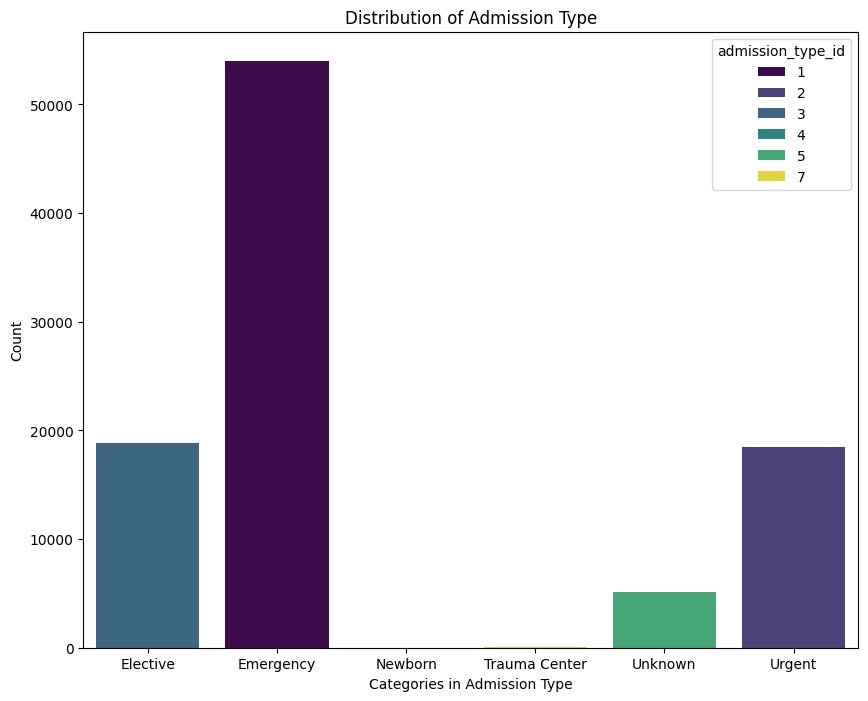

In [194]:
plt.figure(figsize=(10, 8))
sns.barplot(x='description', y='count', data = admission_type_param, hue='admission_type_id', palette='viridis')
plt.title("Distribution of Admission Type")
plt.xlabel("Categories in Admission Type")
plt.ylabel("Count")
plt.show()

In [195]:
data['admission_type_id'] = data['admission_type_id'].replace([5,6,8], 5)

In [196]:
data['admission_type_id'].unique()

array([5, 1, 2, 3, 4, 7])

In [197]:
data['admission_type_id'] = data['admission_type_id'].replace(5, "Unknown")


### 5. Exploring discharge_disposition_id  


In [198]:
data['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [199]:
discharge_disposition_name = mapping[10:39]
discharge_disposition_name

,admission_type_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


In [200]:
data['discharge_disposition_id'].value_counts()

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

### 6. Exploring admission_source_id 

In [201]:
data['admission_source_id'].unique() 

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [202]:
admission_source_name = mapping[42:]

In [203]:
admission_source_name

,admission_type_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available
51,10,Transfer from critial access hospital


In [204]:
data['admission_source_id'].value_counts()

admission_source_id
7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: count, dtype: int64

### 7. Exploring "Time in hospital" - Number of days between admission and discharge

In [205]:
data['time_in_hospital'].unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14])

In [206]:
data['time_in_hospital'].value_counts()

time_in_hospital
3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64

### 8. Exploring Payer code 

In [207]:
data['payer_code'].unique()

array(['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [208]:
data['payer_code'].value_counts()

payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64

In [209]:
data['payer_code'] = data['payer_code'].replace('?','Unknown')

### 9. Exploring Medical Specialty

In [210]:
data['medical_specialty'].unique()

array(['Pediatrics-Endocrinology', '?', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [211]:
data['medical_specialty'].value_counts()

medical_specialty
?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: count, Length: 73, dtype: int64

In [212]:
data['medical_specialty'] = data['medical_specialty'].replace('?','Unknown')

### 10. Exploring Num lab procedures

In [213]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [214]:
data['num_lab_procedures'].unique()

array([ 41,  59,  11,  44,  51,  31,  70,  73,  68,  33,  47,  62,  60,
        55,  49,  75,  45,  29,  35,  42,  66,  36,  19,  64,  25,  53,
        52,  87,  27,  37,  46,  28,  48,  72,  10,   2,  65,  67,  40,
        54,  58,  57,  43,  32,  83,  34,  39,  69,  38,  56,  22,  96,
        78,  61,  88,  50,   1,  18,  82,   9,  63,  24,  71,  77,  81,
        76,  90,  93,   3, 103,  13,  80,  85,  16,  15,  12,  30,  23,
        17,  21,  79,  26,   5,  95,  97,  84,  14,  74, 105,  86,  98,
        20,   6,  94,   8, 102, 100,   7,  89,  91,  92,   4, 101,  99,
       114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121, 126,
       118])

In [215]:
data['num_lab_procedures'].value_counts().reset_index()

,num_lab_procedures,count
0,1,3208
1,43,2804
2,44,2496
3,45,2376
4,38,2213
...,...,...
113,120,1
114,132,1
115,121,1
116,126,1


In [216]:
unique_val = pd.DataFrame({
    "columns" : data.columns, 
    "Unique values" : [data[col].unique() for col in data.columns]
})

In [217]:
unique_val

,columns,Unique values
0,encounter_id,"[2278392, 149190, 64410, 500364, 16680, 35754,..."
1,patient_nbr,"[8222157, 55629189, 86047875, 82442376, 425192..."
2,race,"[Caucasian, AfricanAmerican, Unknown, Other, A..."
3,gender,"[Female, Male, Unknown]"
4,age,"[[0-10), [10-20), [20-30), [30-40), [40-50), [..."
5,admission_type_id,"[Unknown, 1, 2, 3, 4, 7]"
6,discharge_disposition_id,"[25, 1, 3, 6, 2, 5, 11, 7, 10, 4, 14, 18, 8, 1..."
7,admission_source_id,"[1, 7, 2, 4, 5, 6, 20, 3, 17, 8, 9, 14, 10, 22..."
8,time_in_hospital,"[1, 3, 2, 4, 5, 13, 12, 9, 7, 10, 6, 11, 8, 14]"
9,payer_code,"[Unknown, MC, MD, HM, UN, BC, SP, CP, SI, DM, ..."


In [218]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].replace('?','Unknown', regex=False)



In [219]:
Missing_values = pd.DataFrame({
    'columns' : data.columns, 
    'Missing percentage': [data[col].isnull().mean() * 100 for col in data.columns]
})

In [220]:
Missing_values

,columns,Missing percentage
0,encounter_id,0.000000
1,patient_nbr,0.000000
2,race,0.000000
3,gender,0.000000
4,age,0.000000
5,admission_type_id,0.000000
6,discharge_disposition_id,0.000000
7,admission_source_id,0.000000
8,time_in_hospital,0.000000
9,payer_code,0.000000


We will be dropping max_glu_serum, A1Cresult as of now. Because there are more than 80% missing values in them. 

In [221]:
data = data.drop(columns=['max_glu_serum', 'A1Cresult'])

In [222]:
data.columns 

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

### Exploring the target variable readmitted 

In [223]:
readmission = data['readmitted'].value_counts().reset_index()

In [224]:
readmission

,readmitted,count
0,NO,54864
1,>30,35545
2,<30,11357


Text(0, 0.5, 'Counts')

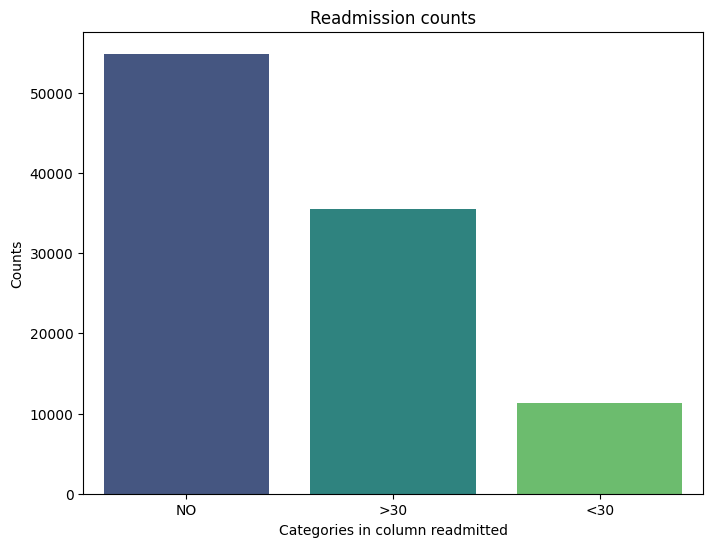

In [225]:
plt.figure(figsize=(8,6))
sns.barplot(x='readmitted', y='count', data=readmission, palette = 'viridis', hue='readmitted')
plt.title("Readmission counts")
plt.xlabel("Categories in column readmitted")
plt.ylabel("Counts")

We are aiming to do readmission binary classification therefore, we will have to combine the 3 categories into 2 categories. We will be merging >30 and <30 counts together and keep NO as a separate category of readmission. 

In [226]:
data['readmission_binary'] = data['readmitted'].apply(lambda x: 0 if x =='NO' else 1 )

In [227]:
data['readmission_binary'].nunique()

2

In [228]:
data['readmission_binary']

0         0
1         1
2         0
3         0
4         0
         ..
101761    1
101762    0
101763    0
101764    0
101765    0
Name: readmission_binary, Length: 101766, dtype: int64

In [229]:
data = data.drop(columns='readmitted')

In [231]:
data = data.drop(columns=['repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton','insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone','encounter_id','patient_nbr', 'payer_code'])

## Data Preprocessing

In [232]:
categorical_columns = []
numeric_columns = []

In [233]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numeric_columns = data.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Columns :  ", categorical_columns)

Categorical Columns :   ['race', 'gender', 'age', 'admission_type_id', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'change', 'diabetesMed']


In [234]:
print("Numerical Columns :  ", numeric_columns)

Numerical Columns :   ['discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmission_binary']


In [235]:
#These ids are actually categorical but are given as numeric 
cat_ids = ['discharge_disposition_id', 'admission_source_id', 'admission_type_id']


for cat in cat_ids:
    if cat in numeric_columns:
        numeric_columns.remove(cat)
    if cat not in categorical_columns:
        categorical_columns.append(cat)

In [236]:
ordinal_columns = ['age']

for col in ordinal_columns: 
    if col in categorical_columns:
        categorical_columns.remove(col)

In [237]:
categorical_columns

['race',
 'gender',
 'admission_type_id',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'metformin',
 'change',
 'diabetesMed',
 'discharge_disposition_id',
 'admission_source_id']

In [238]:
numeric_columns

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'readmission_binary']

In [239]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'change', 'diabetesMed', 'readmission_binary'],
      dtype='object')

In [240]:
y = data['readmission_binary']
X = data.drop(columns='readmission_binary', errors='ignore')

In [241]:
X

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,change,diabetesMed
0,Caucasian,Female,[0-10),Unknown,25,1,1,Pediatrics-Endocrinology,41,0,...,0,0,0,250.83,Unknown,Unknown,1,No,No,No
1,Caucasian,Female,[10-20),1,1,7,3,Unknown,59,0,...,0,0,0,276,250.01,255,9,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,Unknown,11,5,...,2,0,1,648,250,V27,6,No,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,Unknown,44,1,...,0,0,0,8,250.43,403,7,No,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,Unknown,51,0,...,0,0,0,197,157,250,5,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,Unknown,51,0,...,0,0,0,250.13,291,458,9,Steady,Ch,Yes
101762,AfricanAmerican,Female,[80-90),1,4,5,5,Unknown,33,3,...,0,0,1,560,276,787,9,No,No,Yes
101763,Caucasian,Male,[70-80),1,1,7,1,Unknown,53,0,...,1,0,0,38,590,296,13,Steady,Ch,Yes
101764,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,45,2,...,0,0,1,996,285,998,9,No,Ch,Yes


In [242]:
y

0         0
1         1
2         0
3         0
4         0
         ..
101761    1
101762    0
101763    0
101764    0
101765    0
Name: readmission_binary, Length: 101766, dtype: int64

In [243]:
X = X.replace("Unknown", np.nan)

/var/folders/r9/pw08h1h95pv15_bx_49d1tqw0000gn/T/ipykernel_68363/888037954.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace("Unknown", np.nan)


In [244]:
X

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,25,1,1,Pediatrics-Endocrinology,41,0,...,0,0,0,250.83,NaN,NaN,1,No,No,No
1,Caucasian,Female,[10-20),1.0,1,7,3,NaN,59,0,...,0,0,0,276,250.01,255,9,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),1.0,1,7,2,NaN,11,5,...,2,0,1,648,250,V27,6,No,No,Yes
3,Caucasian,Male,[30-40),1.0,1,7,2,NaN,44,1,...,0,0,0,8,250.43,403,7,No,Ch,Yes
4,Caucasian,Male,[40-50),1.0,1,7,1,NaN,51,0,...,0,0,0,197,157,250,5,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1.0,3,7,3,NaN,51,0,...,0,0,0,250.13,291,458,9,Steady,Ch,Yes
101762,AfricanAmerican,Female,[80-90),1.0,4,5,5,NaN,33,3,...,0,0,1,560,276,787,9,No,No,Yes
101763,Caucasian,Male,[70-80),1.0,1,7,1,NaN,53,0,...,1,0,0,38,590,296,13,Steady,Ch,Yes
101764,Caucasian,Female,[80-90),2.0,3,7,10,Surgery-General,45,2,...,0,0,1,996,285,998,9,No,Ch,Yes


In [245]:
high_cardinality = [col for col in categorical_columns if X[col].nunique(dropna=True)>50]
high_cardinality

['medical_specialty', 'diag_1', 'diag_2', 'diag_3']

In [246]:
low_cardinality = [col for col in categorical_columns if X[col].nunique(dropna=True)<=50]
low_cardinality

['race',
 'gender',
 'admission_type_id',
 'metformin',
 'change',
 'diabetesMed',
 'discharge_disposition_id',
 'admission_source_id']

In [247]:
X['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [248]:
age_order = [['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)']]

In [249]:
numeric_cols   = [c for c in numeric_columns if c in X.columns]
low_cat_cols   = [c for c in low_cardinality if c in X.columns]
high_cat_cols  = [c for c in high_cardinality if c in X.columns]
ordinal_cols   = [c for c in ordinal_columns if c in X.columns]
cat_id_int_use = [c for c in cat_ids if c in X.columns]

In [250]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')), 
    ("scale", StandardScaler())    
])

low_cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')), 
    ("encoder", OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

high_cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')), 
    ("encoder", OneHotEncoder(handle_unknown='infrequent_if_exist', min_frequency=100, sparse_output=True))
])
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=age_order))
])

cat_int_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('to_str', FunctionTransformer(lambda s: s.astype(str))),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

In [251]:
preprocessor = ColumnTransformer(transformers=[
    ("numeric", numeric_transformer, numeric_cols), 
    ("low_cadinality_cat", low_cat_transformer,low_cat_cols), 
    ("high_cartinality_cat", high_cat_transformer,high_cat_cols), 
    ("ordinal", ordinal_transformer,ordinal_cols), 
    ("cat_int", cat_int_transformer,cat_id_int_use)
    
], remainder='drop')

## Data Modelling 

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Benchmark Model - Logistic Regression 

In [254]:
classify = Pipeline(steps=[
    ("Preprocessing", preprocessor), 
    ("Model", LogisticRegression(max_iter=2000, class_weight='balanced'))
])

In [255]:
classify.fit(X_train, y_train)
y_pred = classify.predict(X_test)
probabilities = classify.predict_proba(X_test)[:,1]

In [257]:
print("AUC:", roc_auc_score(y_test, probabilities))
print(classification_report(y_test, y_pred))

AUC: 0.6926668945909067
              precision    recall  f1-score   support

           0       0.67      0.66      0.66     10973
           1       0.61      0.61      0.61      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.64      0.64     20354



### Random Forest Classifier Model 

In [258]:
rf_model = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=18,          # let trees expand until all leaves are pure
    min_samples_split=5,     # prevents overfitting
    class_weight="balanced", # handle class imbalance
    random_state=42,
    n_jobs=-1                # use all CPU cores
)


In [259]:
rf_classifier = Pipeline(steps=[
    ("Preprocessing", preprocessor), 
    ("Model", rf_model)
])

In [260]:
rf_classifier.fit(X_train, y_train)

,steps,"[('Preprocessing', ...), ('Model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric', ...), ('low_cadinality_cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [261]:
y_train_rf = rf_classifier.predict_proba(X_train)[:,1]
y_test_rf   = rf_classifier.predict_proba(X_test)[:,1]

# Evaluate
print("Random Forest Results")
print("Training AUC:", roc_auc_score(y_train, y_train_rf))
print("Test AUC:", roc_auc_score(y_test, y_test_rf))

# Threshold = 0.5
y_test_rf_preds = (y_test_rf >= 0.5).astype(int)

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_rf_preds))

print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_rf_preds))

Random Forest Results
Training AUC: 0.7902329999628601
Test AUC: 0.7008098285610833

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.67      0.65      0.66     10973
           1       0.61      0.63      0.62      9381

    accuracy                           0.64     20354
   macro avg       0.64      0.64      0.64     20354
weighted avg       0.64      0.64      0.64     20354


Confusion Matrix (Test):
[[7139 3834]
 [3441 5940]]


In [262]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support, roc_curve
import numpy as np

In [263]:
num_cols = X_train.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object","string","category"]).columns.tolist()

In [264]:
X_train[num_cols] = X_train[num_cols].apply(pd.to_numeric, errors="coerce")
X_test[num_cols]   = X_test[num_cols].apply(pd.to_numeric, errors="coerce")

In [265]:
CAT_MISSING_TOKEN = "__MISSING__"
def to_cat_strings(df, cat_cols):
    df = df.copy()
    for c in cat_cols:
        # Convert to object first to avoid issues with Pandas 'string[pyarrow]' NA
        df[c] = df[c].astype("object")
        df[c] = df[c].where(~df[c].isna(), CAT_MISSING_TOKEN).astype(str)
    return df

In [266]:
X_train_cb = to_cat_strings(X_train, cat_cols)
X_test_cb   = to_cat_strings(X_test,   cat_cols)

In [267]:
cat_idx = [X_train_cb.columns.get_loc(c) for c in cat_cols]

In [268]:
train_pool = Pool(X_train_cb, label=y_train, cat_features=cat_idx)
test_pool   = Pool(X_test_cb,   label=y_test,   cat_features=cat_idx)

In [269]:
cb = CatBoostClassifier(
    depth=6,
    learning_rate=0.06,
    l2_leaf_reg=5.0,
    iterations=3000,
    loss_function="Logloss",
    eval_metric="AUC",
    class_weights=[1.0, 1.0], 
    random_seed=42,
    verbose=False
)
cb.fit(train_pool, eval_set=test_pool, use_best_model=True, early_stopping_rounds=200)

In [270]:
p_tr  = cb.predict_proba(train_pool)[:,1]
p_test = cb.predict_proba(test_pool)[:,1]
print("CatBoost Train AUC:", roc_auc_score(y_train, p_tr))
print("CatBoost Val   AUC:", roc_auc_score(y_test,   p_test))

CatBoost Train AUC: 0.7602534618465003
CatBoost Val   AUC: 0.7096607052072353


In [271]:
fpr, tpr, thr = roc_curve(y_test, p_test)
best_f1, best_t, best_prec, best_rec = -1, 0.5, None, None
for t in thr:
    yhat = (p_test >= t).astype(int)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, yhat, average="binary", zero_division=0)
    if f1 > best_f1:
        best_f1, best_t, best_prec, best_rec = f1, t, prec, rec

print(f"Chosen threshold (CatBoost): {best_t:.3f} → F1={best_f1:.3f} (prec={best_prec:.3f}, rec={best_rec:.3f})")
print("\nClassification Report (test @ threshold):\n", classification_report(y_test, (p_test >= best_t).astype(int), digits=3))
print("Confusion Matrix (Val):\n", confusion_matrix(y_test, (p_test >= best_t).astype(int)))

Chosen threshold (CatBoost): 0.331 → F1=0.667 (prec=0.538, rec=0.878)

Classification Report (test @ threshold):
               precision    recall  f1-score   support

           0      0.772     0.355     0.486     10973
           1      0.538     0.878     0.667      9381

    accuracy                          0.596     20354
   macro avg      0.655     0.616     0.577     20354
weighted avg      0.664     0.596     0.569     20354

Confusion Matrix (Val):
 [[3893 7080]
 [1147 8234]]


In [272]:
import xgboost as xgb
from xgboost import XGBClassifier
from scipy import sparse

In [273]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
X_train_num = X_train[num_cols].to_numpy()
X_val_num   = X_test[num_cols].to_numpy()

X_train_cat = ohe.fit_transform(X_train[cat_cols]) if cat_cols else None
X_val_cat   = ohe.transform(X_test[cat_cols]) if cat_cols else None


In [275]:
if cat_cols:
    Xtr = sparse.hstack([X_train_num, X_train_cat]).tocsr()
    Xva = sparse.hstack([X_val_num,   X_val_cat]).tocsr()
else:
    Xtr = X_train_num
    Xva = X_val_num


xgb = XGBClassifier(
    n_estimators=4000,           
    max_depth=6,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=2.0,
    tree_method="hist",
    eval_metric="auc",           
    early_stopping_rounds=200,   
    random_state=42,
    n_jobs=-1
)

xgb.fit(
    Xtr, y_train,
    eval_set=[(Xva, y_test)],
    verbose=False
)

# --- Evaluate ---
p_tr  = xgb.predict_proba(Xtr)[:,1]
p_val = xgb.predict_proba(Xva)[:,1]
print("XGBoost Train AUC:", roc_auc_score(y_train, p_tr))
print("XGBoost Val   AUC:",  roc_auc_score(y_test,   p_val))



fpr, tpr, thr = roc_curve(y_test, p_val)
best_f1, best_t, best_prec, best_rec = -1, 0.5, None, None
for t in thr:
    yhat = (p_val >= t).astype(int)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_test, yhat, average="binary", zero_division=0
    )
    if f1 > best_f1:
        best_f1, best_t, best_prec, best_rec = f1, t, prec, rec

print(f"\nChosen threshold (XGB): {best_t:.3f} → F1={best_f1:.3f} (prec={best_prec:.3f}, rec={best_rec:.3f})")

yhat_val = (p_val >= best_t).astype(int)
print("\nClassification Report (Val @ threshold):")
print(classification_report(y_test, yhat_val, digits=3))
print("Confusion Matrix (Val):\n", confusion_matrix(y_test, yhat_val))

XGBoost Train AUC: 0.7849701930317744
XGBoost Val   AUC: 0.7111471477902369

Chosen threshold (XGB): 0.323 → F1=0.668 (prec=0.534, rec=0.889)

Classification Report (Val @ threshold):
              precision    recall  f1-score   support

           0      0.781     0.338     0.472     10973
           1      0.534     0.889     0.668      9381

    accuracy                          0.592     20354
   macro avg      0.658     0.614     0.570     20354
weighted avg      0.667     0.592     0.562     20354

Confusion Matrix (Val):
 [[3706 7267]
 [1038 8343]]


### Conclusion 

Our objective was to correctly identify diabetic patients who are most likely to be readmitted within 30 days, as this has direct implications for an insurance provider offering long-term health coverage.

The baseline Logistic Regression achieved an AUC of ~0.69 with balanced but modest precision (0.61) and recall (0.61), indicating limited predictive power. Random Forest improved the AUC to ~0.70, offering more stable precision/recall balance (both ~0.63) but still missing a considerable portion of high-risk patients.

In contrast, both CatBoost and XGBoost reached AUCs around 0.71 and, after threshold optimization, significantly boosted recall to \~0.88–0.90. This means they successfully flagged nearly 9 out of 10 patients who were actually readmitted. However, this gain in recall came at the expense of precision (~0.53–0.54), leading to more false positives.

For an insurance plan company, prioritizing recall is more valuable than precision. Capturing as many high-risk patients as possible helps the insurer anticipate future claims, allocate resources, and design interventions that may reduce costly readmissions. While false positives create some inefficiency, the cost of missing true readmissions is higher.

In summary: Logistic Regression and Random Forest provided useful baselines, but CatBoost and XGBoost emerged as the better models for this business goal. Between them, XGBoost achieved the highest recall (0.89) with stable AUC, making it the most suitable choice for deployment in a real-world insurance risk-management pipeline.